In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import matplotlib.dates as dates
from datetime import datetime

In [3]:
weather=pd.read_csv('weather_by_day.txt')

In [4]:
total_crime=pd.read_csv('crime_felony.txt')
crime=pd.read_csv('crime_felony.txt')


In [5]:
from datetime import datetime
import time
crime['datetime']=crime['Unnamed: 0'].map(lambda x: datetime.strptime(x, '%m/%d/%Y'))
total_crime['datetime']=total_crime['Unnamed: 0'].map(lambda x: datetime.strptime(x, '%m/%d/%Y'))

In [6]:
weather['converted_date']=weather[' YEARMODA'].map(lambda x: str(x)[4:6]+'/'+str(x)[6:]+'/'+str(x)[:4])

In [7]:
day=datetime.strptime('08/01/2012', '%m/%d/%Y')
end=datetime.strptime('05/31/2015', '%m/%d/%Y')
weather = weather.set_index(pd.DatetimeIndex(weather['converted_date']))
weather=weather[(weather.index >= day) & (weather.index <= end )]


In [8]:
weather = weather.set_index(pd.DatetimeIndex(weather['converted_date']))
temp_week=weather['   TEMP'].groupby(pd.TimeGrouper(freq='W')).mean()
temp_month=weather['   TEMP'].groupby(pd.TimeGrouper(freq='M')).mean()
temp_quartly=weather['   TEMP'].groupby(pd.TimeGrouper(freq='Q')).mean()


In [9]:
day=datetime.strptime('08/01/2012', '%m/%d/%Y')
end=datetime.strptime('05/31/2015', '%m/%d/%Y')
crime=crime[(crime.datetime >= day) & (crime.datetime <= end )]
crime = crime.set_index(pd.DatetimeIndex(crime['datetime']))
tday=datetime.strptime('01/01/2006', '%m/%d/%Y')
total_crime['datetime']=total_crime['Unnamed: 0'].map(lambda x: datetime.strptime(x, '%m/%d/%Y'))
total_crime=total_crime[(total_crime.datetime >= tday)]

In [10]:
crime = crime.set_index(pd.DatetimeIndex(crime['datetime']))

In [11]:
crime_week=crime['220'].groupby(pd.TimeGrouper(freq='W')).sum()
crime_month=crime.groupby(pd.TimeGrouper(freq='M')).sum()
crime_quartly=crime.groupby(pd.TimeGrouper(freq='Q')).sum()

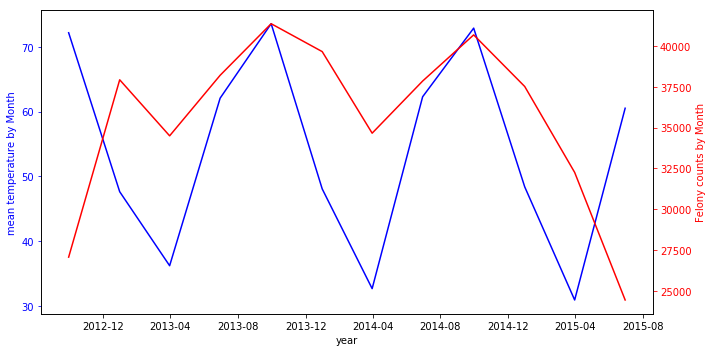

In [53]:
fig, ax1 = plt.subplots(figsize=(10,5))
t= temp_quartly.index.values
s1 = list(temp_quartly)
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('mean temperature by Month', color='b')
ax1.tick_params('y', colors='b')


ax2 = ax1.twinx()
t2= crime_quartly.index.values
s2 = list(crime_quartly['220'])
ax2.plot(t2, s2, 'r-')
ax2.set_ylabel('Felony counts by Month', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

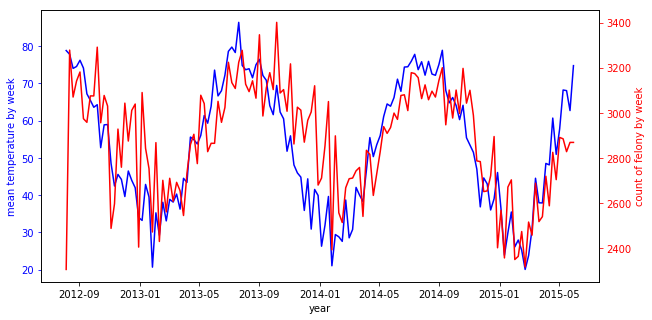

In [54]:
fig, ax1 = plt.subplots(figsize=(10,5))
t= temp_week.index.values
s1 = list(temp_week)
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('mean temperature by week', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
t2= crime_week.index.values
s2 = list(crime_week)
ax2.plot(t2, s2, 'r-')
ax2.set_ylabel('count of felony by week', color='r')
ax2.tick_params('y', colors='r')

#fig.tight_layout()

plt.show()

0.731748220918


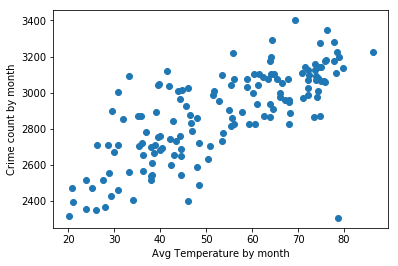

In [55]:
print(temp_week.corr(crime_week))
plt.scatter(temp_week,crime_week)
plt.xlabel('Avg Temperature by month')
plt.ylabel('Crime count by month') 


In [71]:
total_crime['year']=total_crime['datetime'].map(lambda x: int(str(x)[:4]))
crime_year=total_crime['220'].groupby(total_crime['year']).sum()
crime_year


year
2006    174965
2007    167965
2008    164027
2009    149714
2010    147513
2011    148082
2012    153697
2013    153730
2014    150716
2015    146137
Name: 220, dtype: int64

In [ ]:
merged=temp_select.merge(a, left_on='converted_date', right_on='Unnamed: 0', how='inner')
merged=merged.drop('Unnamed: 0', 1)

In [ ]:
import matplotlib.dates as dates
from datetime import datetime
list_of_datetimes=merged['converted_date'].map(lambda x: datetime.strptime(x, '%m/%d/%Y'))
dates = dates.date2num(list(list_of_datetimes))
plt.plot(dates,merged['   TEMP'])
plt.plot(dates,merged['220'])

In [34]:
nyc_income=pd.read_csv('whole-city-income.csv')
income=nyc_income.columns[-1]
nyc_income.columns
nyc_income['Year']
nyc_income['avg_income_float']=nyc_income[income].map(lambda x:float(x[1:]))

In [35]:
nyc_income

,Area Type,Area,NAICS,NAICS Title,Year,Establishments,Average Employment,Total Wage,Annual Average Salary,avg_income_float
0,Metropolitan Statistical Area,New York City,0,"Total, All Industries",2015,265814,4081381,$349947309400,$85742,85742.0
1,Metropolitan Statistical Area,New York City,0,"Total, All Industries",2014,255566,3966183,$336134455321,$84750,84750.0
2,Metropolitan Statistical Area,New York City,0,"Total, All Industries",2013,249598,3839784,$308946902141,$80459,80459.0
3,Metropolitan Statistical Area,New York City,0,"Total, All Industries",2012,243956,3748138,$301969254816,$80565,80565.0
4,Metropolitan Statistical Area,New York City,0,"Total, All Industries",2011,239146,3663121,$292931918211,$79968,79968.0
5,Metropolitan Statistical Area,New York City,0,"Total, All Industries",2010,236025,3590842,$280074537111,$77997,77997.0
6,Metropolitan Statistical Area,New York City,0,"Total, All Industries",2009,229793,3563835,$263428725651,$73917,73917.0
7,Metropolitan Statistical Area,New York City,0,"Total, All Industries",2008,228494,3673669,$295282322788,$80378,80378.0
8,Metropolitan Statistical Area,New York City,0,"Total, All Industries",2007,225422,3640055,$291539321322,$80092,80092.0
9,Metropolitan Statistical Area,New York City,0,"Total, All Industries",2006,221489,3553030,$260323642547,$73268,73268.0


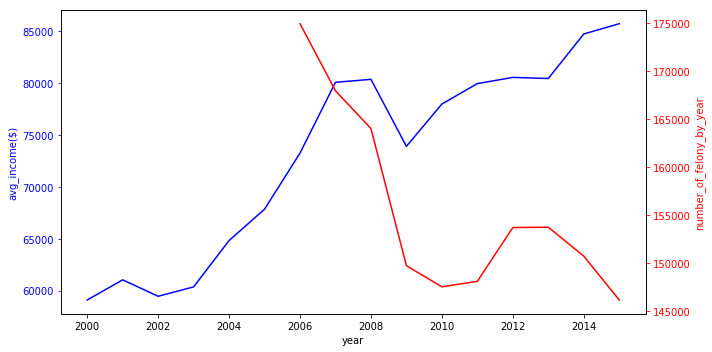

In [106]:
fig, ax1 = plt.subplots(figsize=(10,5))
t = list(nyc_income['Year'])
s1=list(nyc_income['avg_income_float'])
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('avg_income($)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
t2= crime_year.index.values
s2 = list(crime_year)
ax2.plot(t2, s2, 'r-')
ax2.set_ylabel('number_of_felony_by_year', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

In [24]:
crime_year

year
2006    174965
2007    167965
2008    164027
2009    149714
2010    147513
2011    148082
2012    153697
2013    153730
2014    150716
2015    146137
Name: 220, dtype: int64

In [37]:
nyc_income2006=(nyc_income[nyc_income.Year>=2006])
nyc_income2006.columns[-2]


'Annual Average Salary                                                                                                                                                  '

In [37]:
nyc_income2006[nyc_income2006.columns[-1]]

0    85742.0
1    84750.0
2    80459.0
3    80565.0
4    79968.0
5    77997.0
6    73917.0
7    80378.0
8    80092.0
9    73268.0
Name: avg_income_float, dtype: float64

In [70]:
import numpy as np
print(np.corrcoef(crime_year,nyc_income2006[nyc_income2006.columns[-1]]))
#crime_year.corr(nyc_income2006[nyc_income2006.columns[-1]])
plt.scatter(crime_year,nyc_income2006[nyc_income2006.columns[-1]])

NameError: name 'crime_year' is not defined

In [ ]:
sf = shapefile.Reader("shapefiles/blockgroups.shp")

In [ ]:
unemploy.columns

In [45]:

temp_week=weather['   TEMP'].groupby(pd.TimeGrouper(freq='W')).mean()
temp_month=weather['   TEMP'].groupby(pd.TimeGrouper(freq='M')).mean()
temp_quartly=weather['   TEMP'].groupby(pd.TimeGrouper(freq='Q')).mean()
unemploy=pd.read_csv('unemployment_nyc.csv')
#rate=unemploy.columns[-1]
#unemploy_by_year=unemploy[rate].groupby(unemploy['Year']).mean()
unemploy['yearm']=unemploy['Year'].map(lambda x:str(x)+'/')+unemploy['Month'].map(lambda x:str(x))
unemploy['yearm']=unemploy['yearm'].map(lambda x: datetime.strptime(x, '%Y/%m'))
unemploy = unemploy.set_index(pd.DatetimeIndex(unemploy['yearm']))
unemploy_2006=unemploy[unemploy.yearm>datetime.strptime('12/31/2005', '%m/%d/%Y')]
unemploy_2006=unemploy_2006[unemploy_2006.yearm<datetime.strptime('12/31/2015', '%m/%d/%Y')]

In [47]:
u_monthly=unemploy_2006[unemploy_2006.columns[-2]].groupby(pd.TimeGrouper(freq='M')).mean()
u_quartly=unemploy_2006[unemploy_2006.columns[-2]].groupby(pd.TimeGrouper(freq='Q')).mean()
#temp_month=weather['   TEMP'].groupby(pd.TimeGrouper(freq='M')).mean()
#temp_quartly=weather['   TEMP'].groupby(pd.TimeGrouper(freq='Q')).mean()

In [58]:
total_crime = total_crime.set_index(pd.DatetimeIndex(total_crime['datetime']))
tday=datetime.strptime('01/01/2006', '%m/%d/%Y')
total_crime['datetime']=total_crime['Unnamed: 0'].map(lambda x: datetime.strptime(x, '%m/%d/%Y'))
total_crime=total_crime[(total_crime.datetime >= tday)]
crime06q=total_crime['220'].groupby(pd.TimeGrouper(freq='Q')).sum()
crime06m=total_crime['220'].groupby(pd.TimeGrouper(freq='M')).sum()

-0.513041332803


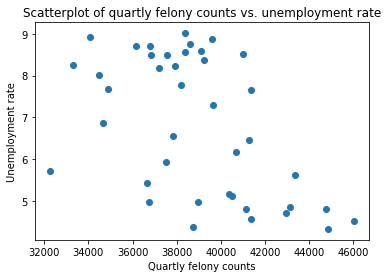

In [68]:
plt.scatter(crime06q,u_quartly)
plt.title('Scatterplot of quartly felony counts vs. unemployment rate')
plt.xlabel('Quartly felony counts')
plt.ylabel('Unemployment rate')
print(u_quartly.corr(crime06q))

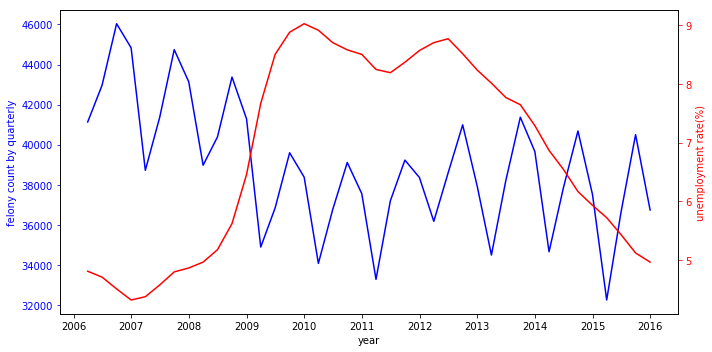

In [64]:
fig, ax1 = plt.subplots(figsize=(10,5))
t= crime06q.index.values
s1 = list(crime06q)
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('felony count by quarterly', color='b')
ax1.tick_params('y', colors='b')

#unemploy2006=unemploy_by_year.ix[2003:]
ax2 = ax1.twinx()
t2= u_quartly.index.values
s2 = list(u_quartly)
ax2.plot(t2, s2, 'r-')
ax2.set_ylabel('unemployment rate(%)', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

In [114]:
unemploy_2006.head()

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate,yearm
yearm,,,,,,,,
2015-01-01,New York State,2015,1,9543200,8995200,548000,5.7,2015-01-01
2015-02-01,New York State,2015,2,9548500,9005700,542700,5.7,2015-02-01
2015-03-01,New York State,2015,3,9552900,9016600,536400,5.6,2015-03-01
2015-04-01,New York State,2015,4,9555000,9026900,528100,5.5,2015-04-01
2015-05-01,New York State,2015,5,9553500,9035800,517700,5.4,2015-05-01


In [48]:
u_yearly=unemploy_2006[unemploy_2006.columns[-2]].groupby(unemploy_2006.Year).mean()

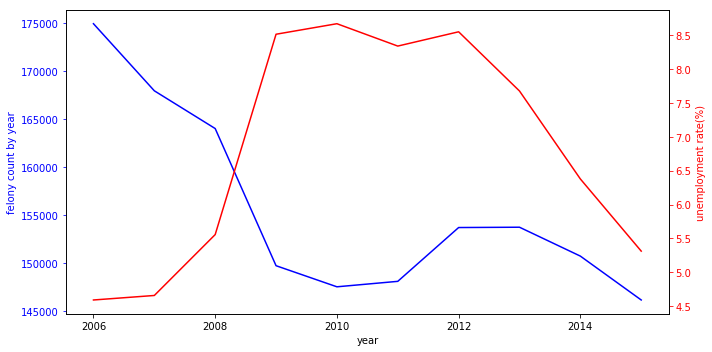

In [118]:
fig, ax1 = plt.subplots(figsize=(10,5))
t= crime_year.index.values
s1 = list(crime_year)
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('felony count by year', color='b')
ax1.tick_params('y', colors='b')

#unemploy2006=unemploy_by_year.ix[2003:]
ax2 = ax1.twinx()
t2= u_yearly.index.values
s2 = list(u_yearly)
ax2.plot(t2, s2, 'r-')
ax2.set_ylabel('unemployment rate(%)', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

In [42]:
abuse=pd.read_csv('abuse_2003.csv')
abuse.columns

Index([u'Claims', u'County', u'Dollars', u'Recipients', u'Service', u'Year'], dtype='object')

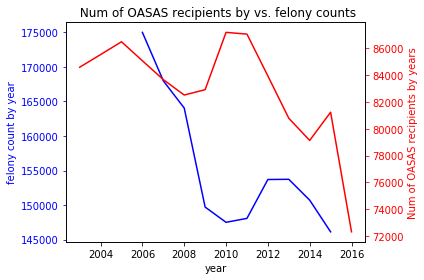

In [102]:
fig, ax1 = plt.subplots()
t= crime_year.index.values
s1 = list(crime_year)
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('felony count by year', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
t2= list(abuse['Year'])
s2 = list(abuse['Recipients'])
ax2.plot(t2, s2, 'r-')
ax2.set_ylabel('Num of OASAS recipients by years', color='r')
ax2.tick_params('y', colors='r')
plt.title(' Num of OASAS recipients by vs. felony counts' )
fig.tight_layout()
plt.show()

In [75]:
s2

[84580,
 85522,
 86477,
 85061,
 83659,
 82509,
 82908,
 87176,
 87047,
 83932,
 80783,
 79127,
 81230,
 72323]

[[ 1.          0.07806385]
 [ 0.07806385  1.        ]]


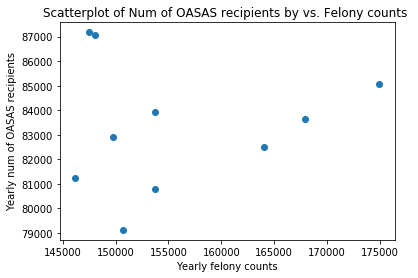

In [94]:
plt.scatter(s1,s2[3:-1])
plt.title('Scatterplot of Num of OASAS recipients by vs. Felony counts ')
plt.xlabel('Yearly felony counts')
plt.ylabel('Yearly num of OASAS recipients')
from scipy.stats.stats import pearsonr     
print np.corrcoef(s1,s2[3:-1])

In [ ]:
fig, ax1 = plt.subplots()
t= unemploy2006.index.values
s1 = list(unemploy2006)
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('unemployment rate($)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
t2= list(abuse['Year'])
s2 = list(abuse['Recipients'])
ax2.plot(t2, s2, 'r-')
ax2.set_ylabel('Num of OASAS recipients by years(person)', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

In [19]:
total_mis.head()

,Unnamed: 0,344,datetime
0,03/28/1998,1,1998-03-28 00:00:00
1,09/16/2008,852,2008-09-16 00:00:00
2,09/23/2008,813,2008-09-23 00:00:00
3,02/25/2010,624,2010-02-25 00:00:00
4,09/27/2013,907,2013-09-27 00:00:00


In [20]:
total_mis=pd.read_csv('crime_misdemeanor.out')
mis=pd.read_csv('crime_misdemeanor.out')
mis['datetime']=mis['Unnamed: 0'].map(lambda x: datetime.strptime(x, '%m/%d/%Y'))
total_mis['datetime']=total_mis['Unnamed: 0'].map(lambda x: datetime.strptime(x, '%m/%d/%Y'))
day=datetime.strptime('08/01/2012', '%m/%d/%Y')
end=datetime.strptime('05/31/2015', '%m/%d/%Y')
mis=mis[(mis.datetime >= day) & (mis.datetime <= end )]
mis = mis.set_index(pd.DatetimeIndex(mis['datetime']))
tday=datetime.strptime('01/01/2006', '%m/%d/%Y')
total_mis['datetime']=total_mis['Unnamed: 0'].map(lambda x: datetime.strptime(x, '%m/%d/%Y'))
total_mis=total_mis[(total_mis.datetime >= tday)]

In [22]:
mis = mis.set_index(pd.DatetimeIndex(mis['datetime']))

In [21]:
mis_week=mis['344'].groupby(pd.TimeGrouper(freq='W')).sum()
mis_month=mis.groupby(pd.TimeGrouper(freq='M')).sum()
mis_quartly=mis.groupby(pd.TimeGrouper(freq='Q')).sum()

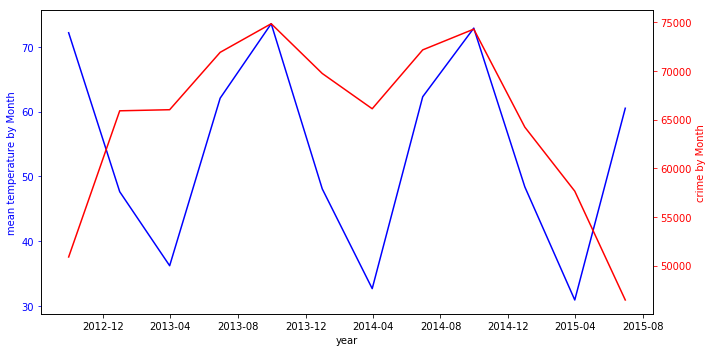

In [24]:
fig, ax1 = plt.subplots(figsize=(10,5))
t= temp_quartly.index.values
s1 = list(temp_quartly)
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('mean temperature by Month', color='b')
ax1.tick_params('y', colors='b')


ax2 = ax1.twinx()
t2= mis_quartly.index.values
s2 = list(mis_quartly['344'])
ax2.plot(t2, s2, 'r-')
ax2.set_ylabel('Misdemeanor by Month', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

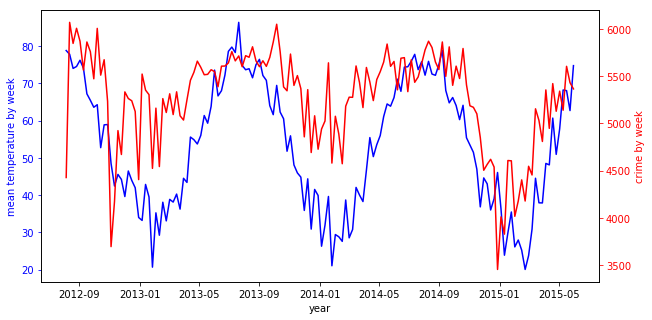

In [25]:
fig, ax1 = plt.subplots(figsize=(10,5))
t= temp_week.index.values
s1 = list(temp_week)
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('mean temperature by week', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
t2= mis_week.index.values
s2 = list(mis_week)
ax2.plot(t2, s2, 'r-')
ax2.set_ylabel('crime by week', color='r')
ax2.tick_params('y', colors='r')

#fig.tight_layout()

plt.show()

0.707610321774


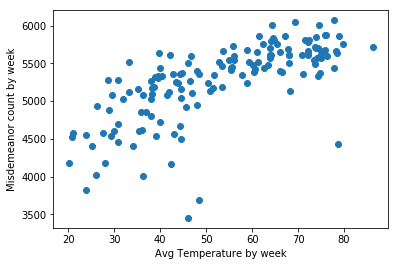

In [27]:
print(temp_week.corr(mis_week))
plt.scatter(temp_week,mis_week)
plt.xlabel('Avg Temperature by week')
plt.ylabel('Misdemeanor count by week')

In [29]:
total_mis['year']=total_mis['datetime'].map(lambda x: int(str(x)[:4]))
mis_year=total_mis['344'].groupby(total_mis['year']).sum()

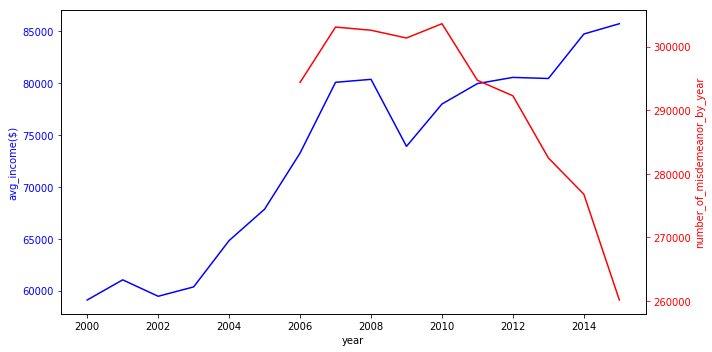

In [41]:
fig, ax1 = plt.subplots(figsize=(10,5))
t = list(nyc_income['Year'])
s1=list(nyc_income['avg_income_float'])
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('avg_income($)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
t2= mis_year.index.values
s2 = list(mis_year)
ax2.plot(t2, s2, 'r-')
ax2.set_ylabel('number_of_misdemeanor_by_year', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

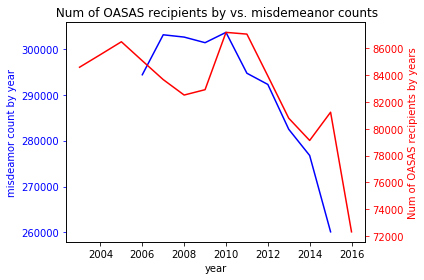

In [101]:
fig, ax1 = plt.subplots()
t= mis_year.index.values
s1 = list(mis_year)
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('misdeamor count by year', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
t2= list(abuse['Year'])
s2 = list(abuse['Recipients'])
ax2.plot(t2, s2, 'r-')
ax2.set_ylabel('Num of OASAS recipients by years', color='r')
ax2.tick_params('y', colors='r')
plt.title(' Num of OASAS recipients by vs. misdemeanor counts' )
fig.tight_layout()
plt.show()

[[ 1.         0.6167847]
 [ 0.6167847  1.       ]]


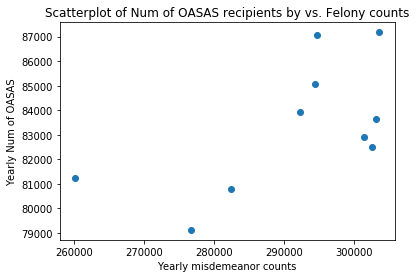

In [100]:
plt.scatter(s1,s2[3:-1])
plt.title('Scatterplot of Num of OASAS recipients by vs. Felony counts' )
plt.xlabel('Yearly misdemeanor counts')
plt.ylabel('Yearly Num of OASAS')
from scipy.stats.stats import pearsonr     
print np.corrcoef(s1,s2[3:-1])

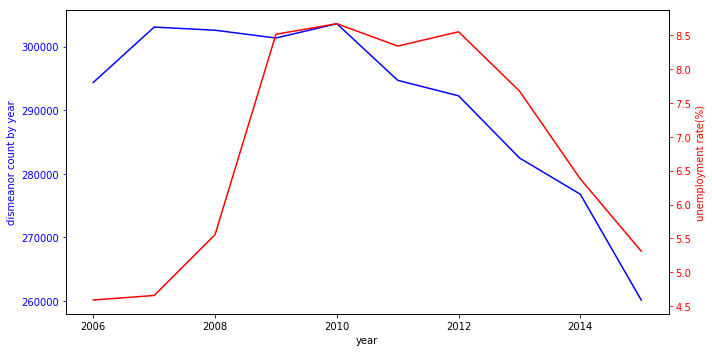

In [50]:
fig, ax1 = plt.subplots(figsize=(10,5))
t= mis_year.index.values
s1 = list(mis_year)
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('dismeanor count by year', color='b')
ax1.tick_params('y', colors='b')

#unemploy2006=unemploy_by_year.ix[2003:]
ax2 = ax1.twinx()
t2= u_yearly.index.values
s2 = list(u_yearly)
ax2.plot(t2, s2, 'r-')
ax2.set_ylabel('unemployment rate(%)', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()